In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from google.colab import files

In [2]:
# Upload the file
uploaded = files.upload()

Saving Book1.csv to Book1.csv


In [3]:
# Get the uploaded file name
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Uploaded file: Book1.csv


In [4]:
# Load Excel file with pandas (modify if CSV)
df = pd.read_excel(file_name, engine='openpyxl')
print(f"Loaded '{file_name}' successfully")


Loaded 'Book1.csv' successfully


In [5]:
# Drop unwanted columns
df = df.drop(columns=['Timestamp'])

In [6]:
# Map target column to binary label
df['Diabetes'] = df['Have you been diagnosed with diabetes at any point in your life?'].map({'Yes':1, 'No':0})
df = df.drop(columns=['Have you been diagnosed with diabetes at any point in your life?'])

In [7]:
# One-hot encode categorical 'Gender'
df = pd.get_dummies(df, columns=['What is Your Gender?'], prefix='Gender')

In [8]:
# Map binary columns to 0/1
binary_cols = [
    'Have you engaged in any physical activity or exercise, other than your regular job, on at least 3 days per week',
    'Do you smoke more than 10 cigarettes per day?',
    'Do you consume alcohol above this heavy drinking threshold?',
    'Has your mother or father ever been diagnosed with diabetes?'
]
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

In [9]:
# Normalize numerical columns
scaler = MinMaxScaler()
num_cols = ['What is your age?', 'What is your Height?', 'What is your Weight?']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [10]:
# Save preprocessed DataFrame to CSV
preprocessed_csv_path = 'preprocessed_dataset.csv'
df.to_csv(preprocessed_csv_path, index=False)
print(f"Preprocessed data saved to '{preprocessed_csv_path}'")

Preprocessed data saved to 'preprocessed_dataset.csv'


In [11]:
# Download the CSV file
files.download(preprocessed_csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please upload the 'preprocessed_data.csv' file.


Saving preprocessed_dataset.csv to preprocessed_dataset (5).csv
Successfully uploaded 'preprocessed_dataset (5).csv'.

Data successfully loaded and split for training.
Training features shape: (203, 10)
Testing features shape: (51, 10)

--- Model Architecture ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8745 - loss: 0.6134 - val_accuracy: 0.8293 - val_loss: 0.5984
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8417 - loss: 0.5974 - val_accuracy: 0.8293 - val_loss: 0.5777
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8731 - loss: 0.5646 - val_accuracy: 0.8293 - val_loss: 0.5584
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8481 - loss: 0.5581 - val_accuracy: 0.8293 - val_loss: 0.5430
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8505 - loss: 0.5405 - val_accuracy: 0.8293 - val_loss: 0.5275
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8668 - loss: 0.5162 - val_accuracy: 0.8293 - val_loss: 0.5149
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8604 - loss: 0.5053 - val_accuracy: 0.8293 - val_loss: 0.5043
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8272 - loss: 0.5062 - val_acc

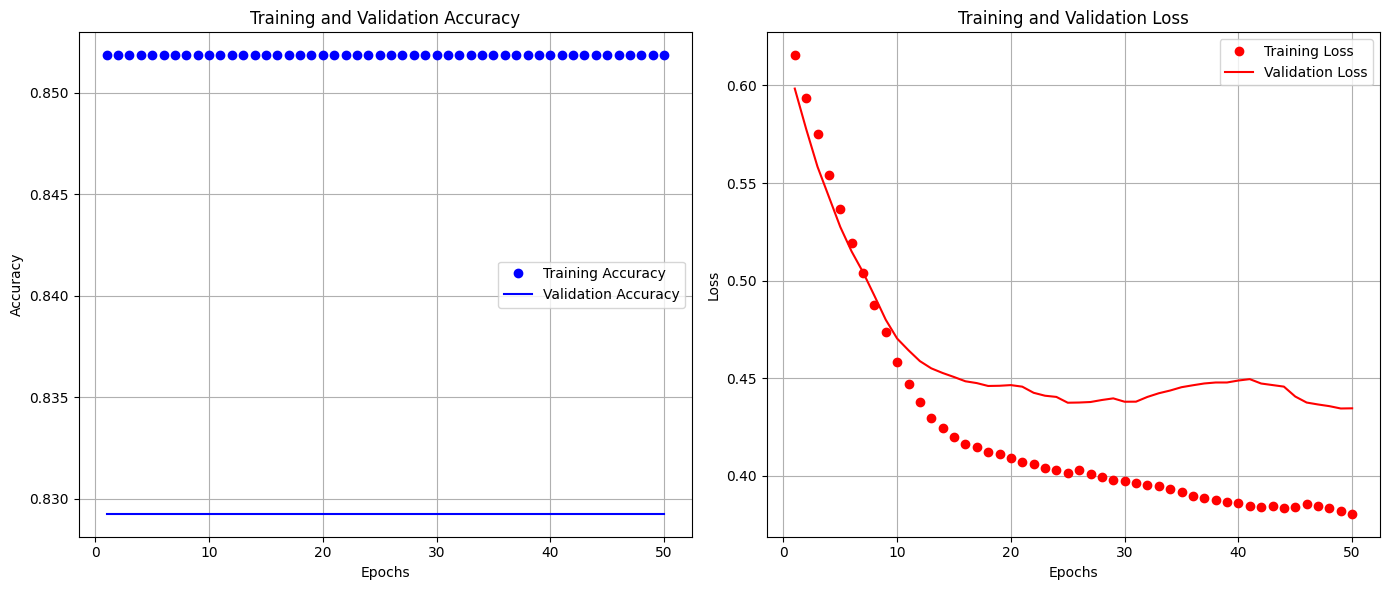

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


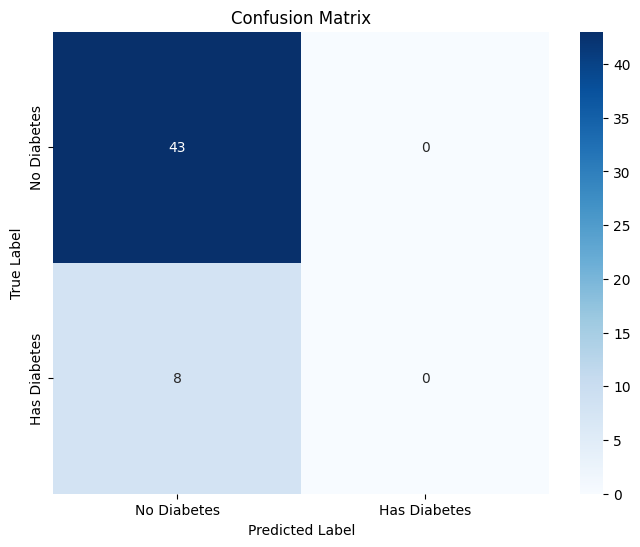

In [16]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from google.colab import files
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1: Upload the Preprocessed Dataset ---
print("Please upload the 'preprocessed_data.csv' file.")
uploaded = files.upload()

# Get the name of the uploaded file
try:
    file_name = list(uploaded.keys())[0]
    print(f"Successfully uploaded '{file_name}'.")
except IndexError:
    print("No file was uploaded. Please run the cell again.")
    sys.exit()

# --- Step 2: Load and Prepare the Data ---
# Load the preprocessed data into a DataFrame
df = pd.read_csv(file_name)

# Identify the target column.
target_col = 'Diabetes'

if target_col not in df.columns:
    print(f"Error: Target column '{target_col}' not found in the uploaded file.")
    print("Please make sure you've uploaded the correct 'preprocessed_data.csv' file.")
    sys.exit()

# Separate features (X) and the target variable (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Split the data into a training set and a testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData successfully loaded and split for training.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


# --- Step 3: Build the Neural Network ---
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# --- Step 4: Compile the Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print a summary of the model's architecture
print("\n--- Model Architecture ---")
model.summary()


# --- Step 5: Train the Model ---
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

print("\n✅ Model training completed!")

# --- Step 6: Evaluate the Model on Test Data ---
print("\n--- Evaluating Model Performance on Test Data ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# --- Step 7: Visualize Model Performance ---

# --- Plot 1: Learning Curves for Accuracy and Loss ---
history_dict = history.history

# Get the accuracy and loss values using the correct keys
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Create a range of epochs to plot against
epochs = range(1, len(acc) + 1)

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Subplot 2: Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


# --- Plot 2: Confusion Matrix ---
# Get the model's predictions on the test set.
y_pred_probs = model.predict(X_test)
# Classify predictions above 0.5 as 1 (has diabetes) and below as 0.
y_pred = (y_pred_probs > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Has Diabetes'],
            yticklabels=['No Diabetes', 'Has Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()